In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

In [13]:
# Creating a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)

#signal
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) 

#clean signal
f_clean = f

#signal with noise
f_noise = f + 2.5*np.random.randn(len(t))

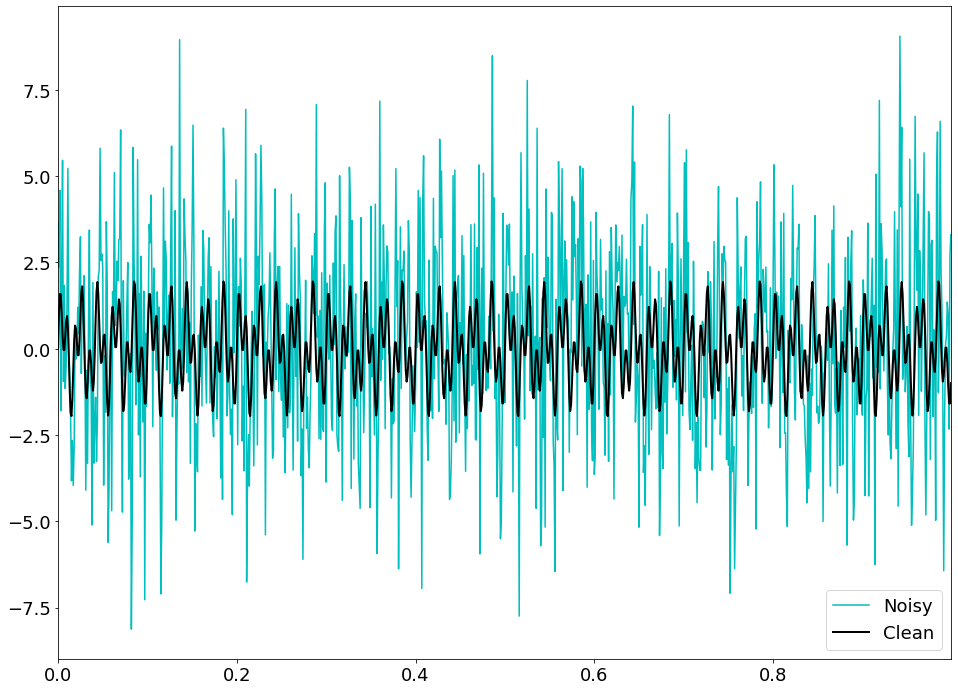

In [14]:
#plotting the signals

plt.plot(t, f_noise, color="c", LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color="k", LineWidth=2, label="Clean")
plt.xlim(t[0], t[-1])
plt.legend()

In [23]:
# computing the FFT

n = len(t)
fhat = np.fft.fft(f_noise,n)               # compute the fft
PSD = fhat * np.conj(fhat) / n       # Power spectrum (power per freq)

#creating x-axis of freq
freq = (1/(dt*n)) * np.arange(n)

#only plot the first half
L = np.arange(1,np.floor(n/2),dtype='int')



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


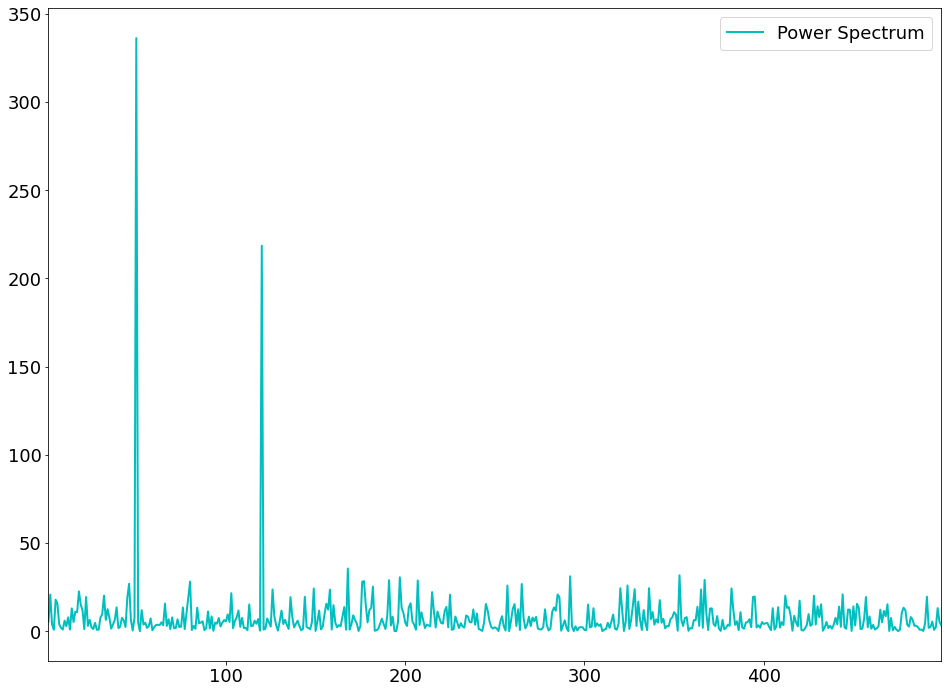

In [24]:
#plot the power sprectrum
plt.plot(freq[L], PSD[L], color='c', LineWidth=2, label="Power Spectrum")
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

In [25]:
# using the PSD to filter out noise
indices = PSD > 100      # find out freqs with large power
PSDclean = PSD * indices # zero out all others
fhat = indices * fhat    # zero out small Fourier coeffs in Y

# now, computing the filtered signal by inverse fft of the removed coeff
ffilt = np.fft.ifft(fhat)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


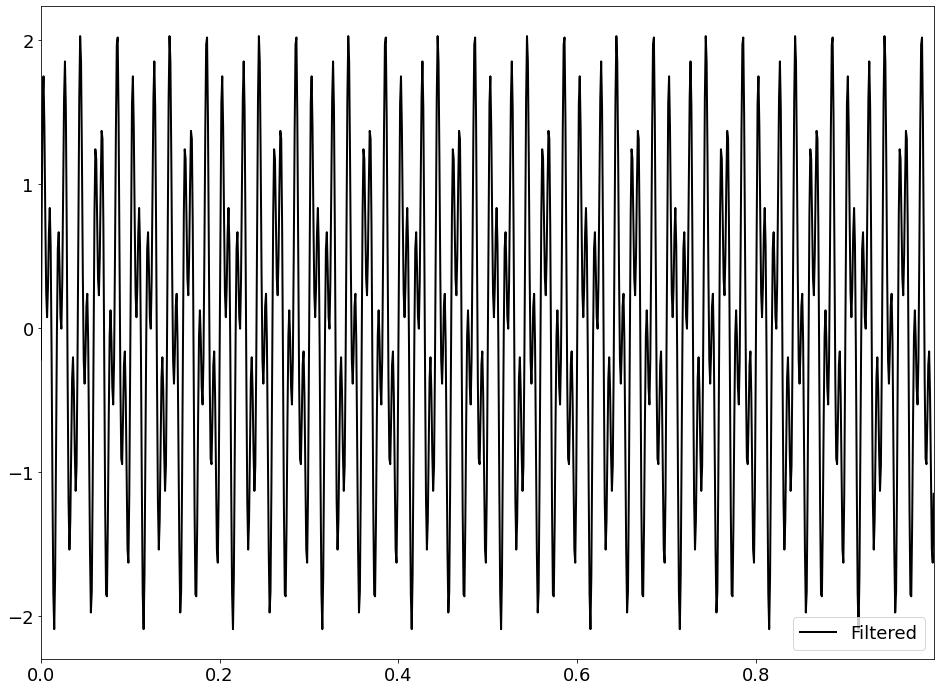

In [26]:
#ploting the filtered signal

plt.plot(t, ffilt, color='k', LineWidth=2, label="Filtered")
plt.xlim(t[0], t[-1])
plt.legend()